# MakeMore: A Character Level Language Model (Modeld used are Bigram Model, MLP, CNN, RNN, LSTM, GRU, Transformer)

## Introduction

### makemore takes one file as input data, from that input data each line is considered as one training thing or name
### it is the character level language model, we give input to our model with 32k names to train and learn the patterns in the names and generate new names based on the learned patterns

1. Input data exploration

In [48]:
words = open('names.txt').read().splitlines()
words[:5]

['emma', 'olivia', 'ava', 'isabella', 'sophia']

In [49]:
print("total no of words in the text file :", len(words))

total no of words in the text file : 32033


In [50]:
print("min and max length of  words in the whole text file", min(len(w) for w in words),",", max(len(w) for w in words))

min and max length of  words in the whole text file 2 , 15


In [51]:
"""for Example if we consider the word 'isabella' from the Bag of words(BOW)
 then first letter is going to be 'i' then target is s,
 for 'is' target is a ,
 for 'isa' the target is b,
 for 'isab' target is e
..... so on at end we get the 'isabella' after this its going to end

so this how we mean the statistical likely hood of what the next sequence of characters looks like

-> we need to train our model like this with all the 32,033 words like this

-> we are going to use Bigram model to train with to see how the next character of the language model is going to be.
-> what Bigram meaning is?
 ans: A Bigram language model is a type of statistical language model used in Natural Language Processing (NLP) to predict the next word in a sequence based on the immediately preceding word.
        Bigram is strictly 2 character at a time"""


"for Example if we consider the word 'isabella' from the Bag of words(BOW)\n then first letter is going to be 'i' then target is s,\n for 'is' target is a ,\n for 'isa' the target is b,\n for 'isab' target is e\n..... so on at end we get the 'isabella' after this its going to end\n\nso this how we mean the statistical likely hood of what the next sequence of characters looks like\n\n-> we need to train our model like this with all the 32,033 words like this\n\n-> we are going to use Bigram model to train with to see how the next character of the language model is going to be.\n-> what Bigram meaning is?\n ans: A Bigram language model is a type of statistical language model used in Natural Language Processing (NLP) to predict the next word in a sequence based on the immediately preceding word.\n        Bigram is strictly 2 character at a time"

In [52]:
words[:5]

['emma', 'olivia', 'ava', 'isabella', 'sophia']

In [53]:
# example of zip function
names = ["Alice", "Bob", "Charlie"]
ages = [30, 24, 35]

# Zipping the two lists
zipped_data = zip(names, ages)

# Converting the zip object to a list to view the contents
print(list(zipped_data))

[('Alice', 30), ('Bob', 24), ('Charlie', 35)]


In [54]:
### we are training model on character so we wnat to split by character

In [55]:
for w in words[:5]:
   print(list(zip(w, w[1:])))

[('e', 'm'), ('m', 'm'), ('m', 'a')]
[('o', 'l'), ('l', 'i'), ('i', 'v'), ('v', 'i'), ('i', 'a')]
[('a', 'v'), ('v', 'a')]
[('i', 's'), ('s', 'a'), ('a', 'b'), ('b', 'e'), ('e', 'l'), ('l', 'l'), ('l', 'a')]
[('s', 'o'), ('o', 'p'), ('p', 'h'), ('h', 'i'), ('i', 'a')]


## Now spliting the data into characters

In [56]:
for w in words[:2]:
    print("name : ",w)
    for ch1, ch2 in zip( w, w[1:]):
        print(ch1, ch2)

name :  emma
e m
m m
m a
name :  olivia
o l
l i
i v
v i
i a


In [57]:
#we are adding this so that we can track start and end of each word. it has start and end indicator for each name
['<S>'] + list(w)+['<E>']

['<S>', 'o', 'l', 'i', 'v', 'i', 'a', '<E>']

In [58]:
for w in words[:2]:
    # chs is new list which has start and end of name
    chs = ['<S>'] + list(w)+['<E>']
    print(chs)
    for ch1, ch2 in zip(chs, chs[1:]):
        print(ch1, ch2)

['<S>', 'e', 'm', 'm', 'a', '<E>']
<S> e
e m
m m
m a
a <E>
['<S>', 'o', 'l', 'i', 'v', 'i', 'a', '<E>']
<S> o
o l
l i
i v
v i
i a
a <E>


In [59]:
bow = {}
for w in words:
    chs = ['<S>'] + list(w)+['<E>']
    for ch1, ch2 in zip(chs, chs[1:]):
        bigram = (ch1, ch2)
        bow[bigram] = bow.get(bigram,0)+1
bow

{('<S>', 'e'): 1531,
 ('e', 'm'): 769,
 ('m', 'm'): 168,
 ('m', 'a'): 2590,
 ('a', '<E>'): 6640,
 ('<S>', 'o'): 394,
 ('o', 'l'): 619,
 ('l', 'i'): 2480,
 ('i', 'v'): 269,
 ('v', 'i'): 911,
 ('i', 'a'): 2445,
 ('<S>', 'a'): 4410,
 ('a', 'v'): 834,
 ('v', 'a'): 642,
 ('<S>', 'i'): 591,
 ('i', 's'): 1316,
 ('s', 'a'): 1201,
 ('a', 'b'): 541,
 ('b', 'e'): 655,
 ('e', 'l'): 3248,
 ('l', 'l'): 1345,
 ('l', 'a'): 2623,
 ('<S>', 's'): 2055,
 ('s', 'o'): 531,
 ('o', 'p'): 95,
 ('p', 'h'): 204,
 ('h', 'i'): 729,
 ('<S>', 'c'): 1542,
 ('c', 'h'): 664,
 ('h', 'a'): 2244,
 ('a', 'r'): 3264,
 ('r', 'l'): 413,
 ('l', 'o'): 692,
 ('o', 't'): 118,
 ('t', 't'): 374,
 ('t', 'e'): 716,
 ('e', '<E>'): 3983,
 ('<S>', 'm'): 2538,
 ('m', 'i'): 1256,
 ('a', 'm'): 1634,
 ('m', 'e'): 818,
 ('<S>', 'h'): 874,
 ('r', 'p'): 14,
 ('p', 'e'): 197,
 ('e', 'r'): 1958,
 ('r', '<E>'): 1377,
 ('e', 'v'): 463,
 ('v', 'e'): 568,
 ('l', 'y'): 1588,
 ('y', 'n'): 1826,
 ('n', '<E>'): 6763,
 ('b', 'i'): 217,
 ('i', 'g'): 428,


In [60]:
"""what bow tell you is this across all the bag of words from the dataset
-> how many times it  starts with letter e["('<S>', 'e')"] is 1531 time
-> letter e and m combination came ('e', 'm')) 769 times
-> names ending with a is (('a', '<E>') 6640 times

*the dictionary bow constist of all this information about 1) how many times a letter is started and ended in name 2) how many times both the character has occured through out the input data*

-> this are counts of individual bigrams and hidden statistics of the Bag of words
"""

'what bow tell you is this across all the bag of words from the dataset\n-> how many times it  starts with letter e["(\'<S>\', \'e\')"] is 1531 time\n-> letter e and m combination came (\'e\', \'m\')) 769 times\n-> names ending with a is ((\'a\', \'<E>\') 6640 times\n\n*the dictionary bow constist of all this information about 1) how many times a letter is started and ended in name 2) how many times both the character has occured through out the input data*\n\n-> this are counts of individual bigrams and hidden statistics of the Bag of words\n'

In [61]:
## now we want to sort the elements based on the counts
sorted(bow.items(), key = lambda kv : -kv[1])

[(('n', '<E>'), 6763),
 (('a', '<E>'), 6640),
 (('a', 'n'), 5438),
 (('<S>', 'a'), 4410),
 (('e', '<E>'), 3983),
 (('a', 'r'), 3264),
 (('e', 'l'), 3248),
 (('r', 'i'), 3033),
 (('n', 'a'), 2977),
 (('<S>', 'k'), 2963),
 (('l', 'e'), 2921),
 (('e', 'n'), 2675),
 (('l', 'a'), 2623),
 (('m', 'a'), 2590),
 (('<S>', 'm'), 2538),
 (('a', 'l'), 2528),
 (('i', '<E>'), 2489),
 (('l', 'i'), 2480),
 (('i', 'a'), 2445),
 (('<S>', 'j'), 2422),
 (('o', 'n'), 2411),
 (('h', '<E>'), 2409),
 (('r', 'a'), 2356),
 (('a', 'h'), 2332),
 (('h', 'a'), 2244),
 (('y', 'a'), 2143),
 (('i', 'n'), 2126),
 (('<S>', 's'), 2055),
 (('a', 'y'), 2050),
 (('y', '<E>'), 2007),
 (('e', 'r'), 1958),
 (('n', 'n'), 1906),
 (('y', 'n'), 1826),
 (('k', 'a'), 1731),
 (('n', 'i'), 1725),
 (('r', 'e'), 1697),
 (('<S>', 'd'), 1690),
 (('i', 'e'), 1653),
 (('a', 'i'), 1650),
 (('<S>', 'r'), 1639),
 (('a', 'm'), 1634),
 (('l', 'y'), 1588),
 (('<S>', 'l'), 1572),
 (('<S>', 'c'), 1542),
 (('<S>', 'e'), 1531),
 (('j', 'a'), 1473),
 (

In [62]:
""" From the output we can say that, 1) the 'n' and 'a' is the most likely to be an ending characters from our input text file
                                     2) the combination of 'a' and 'n' is most likely to occurs through out many names

a. we want to keep this information in 2 dimensional array instead of python dictionary
b. 2d array where rows are the first character and columns are going to be second character of bigram. this tells us how ofter first and second character fall in dataset
C. we use pytorch library where it helps us to create multidimensional array
"""

" From the output we can say that, 1) the 'n' and 'a' is the most likely to be an ending characters from our input text file\n                                     2) the combination of 'a' and 'n' is most likely to occurs through out many names\n\na. we want to keep this information in 2 dimensional array instead of python dictionary\nb. 2d array where rows are the first character and columns are going to be second character of bigram. this tells us how ofter first and second character fall in dataset\nC. we use pytorch library where it helps us to create multidimensional array\n"

In [91]:
import torch
a = torch.zeros((3,5), dtype = torch.int32)
print(a)

tensor([[0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0]], dtype=torch.int32)


In [92]:
# some manipulation with tensor
a[1,3] += 1
print(a)

tensor([[0, 0, 0, 0, 0],
        [0, 0, 0, 1, 0],
        [0, 0, 0, 0, 0]], dtype=torch.int32)


In [93]:
a[0,0] = 5
print(a)

tensor([[5, 0, 0, 0, 0],
        [0, 0, 0, 1, 0],
        [0, 0, 0, 0, 0]], dtype=torch.int32)


In [94]:
## Now we are converting python dictionary to Pytorch array which is deep learning library
N = torch.zeros((28,28), dtype = torch.int32) # we are creating 28 * 28 tensor with zeros
N

tensor([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0

In [95]:
# Now we are taking all the names join them as massive string and throws out all the duplicates using set function and get the list of strings used
chars = (sorted(list(set(''.join(words)))))
# gives us the list of characters used in the text file
chars[:5]

['a', 'b', 'c', 'd', 'e']

In [96]:
# String to integer(stoi) is a dictionary, where we are converting above used string characters  to integer.
stoi = { s:i for i,s in enumerate(chars)}
#Now we want to add start['<S>'] and end['<E>'] to this as well to our character to integer dictionary.

stoi['<S>'] = 26
stoi['<E>'] = 27
stoi

{'a': 0,
 'b': 1,
 'c': 2,
 'd': 3,
 'e': 4,
 'f': 5,
 'g': 6,
 'h': 7,
 'i': 8,
 'j': 9,
 'k': 10,
 'l': 11,
 'm': 12,
 'n': 13,
 'o': 14,
 'p': 15,
 'q': 16,
 'r': 17,
 's': 18,
 't': 19,
 'u': 20,
 'v': 21,
 'w': 22,
 'x': 23,
 'y': 24,
 'z': 25,
 '<S>': 26,
 '<E>': 27}

In [97]:
## Now Similarly we need to create the integer to string converter
itos = { i:s for s,i in stoi.items()}
itos

{0: 'a',
 1: 'b',
 2: 'c',
 3: 'd',
 4: 'e',
 5: 'f',
 6: 'g',
 7: 'h',
 8: 'i',
 9: 'j',
 10: 'k',
 11: 'l',
 12: 'm',
 13: 'n',
 14: 'o',
 15: 'p',
 16: 'q',
 17: 'r',
 18: 's',
 19: 't',
 20: 'u',
 21: 'v',
 22: 'w',
 23: 'x',
 24: 'y',
 25: 'z',
 26: '<S>',
 27: '<E>'}

In [106]:
for w in words:
    chs = ['<S>'] + list(w) + ['<E>']
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1] #ix1 = row index
        ix2 = stoi[ch2] # ix2 = column index

        N[ix1, ix2] += 1 # this will increase the count of the particular location by 1
        """ for example
        a) if we have (<S>, a) in seqeunce , then what will happen now is we do String to Integer Conversion(stoi) i.e., (<S>,a) : (26,0) at the 26th row and 0th column the value is increased to plus 1
        b) similary if we have (y,<E>) -> (ix1, ix2) ->  at (24,27)th location the count is increased by 1
        """
N

array([[ 556,  541,  473, 1050,  696,  140,  173, 2339, 1658,  184,  573,
        2532, 1643, 5447,   67,   84,   64, 3273, 1126,  687,  382,  841,
         168,  189, 2053,  435,    0, 6644],
       [ 323,   40,    9,   69,  661,    3,    2,   47,  225,    1,    2,
         106,    6,   12,  108,    9,    6,  846,   15,    7,   46,    3,
           0,    0,   90,    2,    7,  115],
       [ 821,    9,   49,    2,  553,    2,    8,  669,  273,   11,  319,
         124,    0,    0,  381,    7,   15,   83,   14,   35,   37,    5,
           1,    9,  109,    5,    6,   97],
       [1307,    5,    8,  153, 1284,    9,   27,  127,  676,   12,   10,
          65,   39,   38,  380,    1,    5,  428,   37,   10,   99,   23,
          25,    1,  318,    2,    2,  525],
       [ 680,  128,  155,  386, 1279,   91,  125,  152,  818,   55,  181,
        3249,  770, 2677,  273,   85,   22, 1967,  865,  587,   72,  463,
          54,  133, 1075,  188,    6, 3990],
       [ 247,    0,    9,    5,  12

In [107]:
"""
1) you can notice that we made a tensor of 28*28(N*N),, where we have 28 charcters  in the sequence.
2) all the numbers represents the count of number of time it occured.
3) now I will create a neat visualization to display the output.
"""

'\n1) you can notice that we made a tensor of 28*28(N*N),, where we have 28 charcters  in the sequence.\n2) all the numbers represents the count of number of time it occured.\n3) now I will create a neat visualization to display the output.\n'

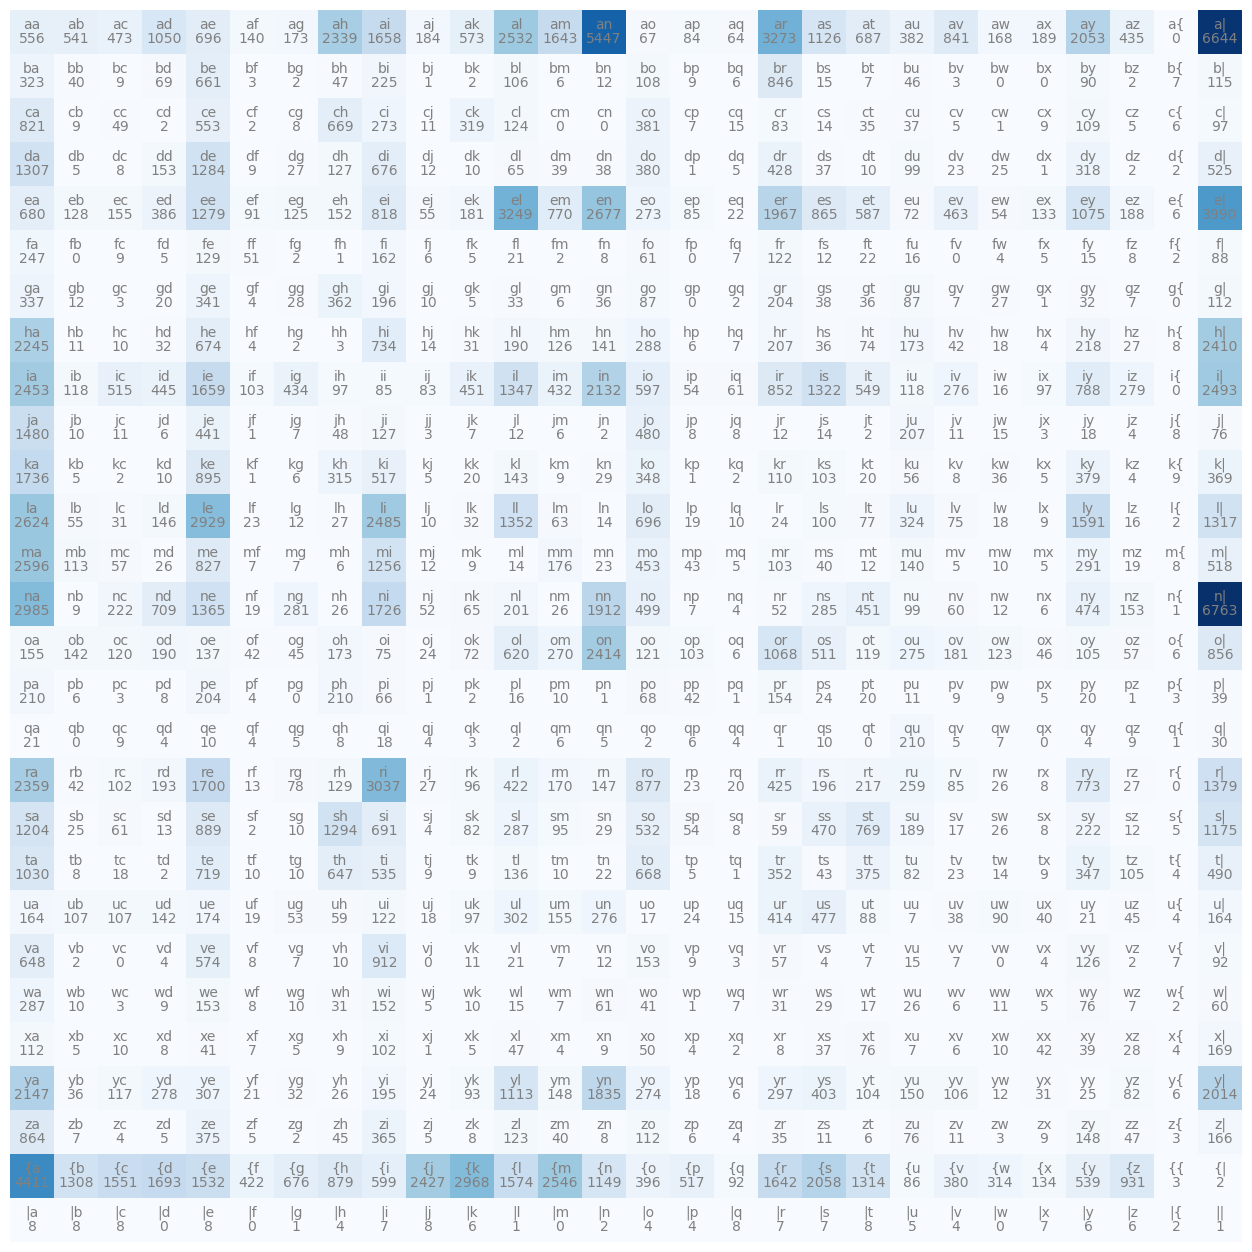

In [111]:
import matplotlib.pyplot as plt
#%matplotlib inline

plt.figure(figsize = (16,16))
plt.imshow(N, cmap = 'Blues')
for i in range(28):
    for j in range(28):
        chstr = itos[i] + itos[j]
        plt.text(j, i, chstr, ha = 'center', va = 'bottom', color = 'gray')
        plt.text(j,i, N[i,j].item(), ha = 'center', va = 'top', color = 'gray')
plt.axis('off')
plt.show()

In [114]:
N[3,3]

153